In [1]:
from rnn import RNN
import copy, numpy as np
from activation import Sigmoid

np.random.seed(0)

In [2]:
def bin2int(d):
    out = 0
    for index,x in enumerate(d):
        out += x*pow(2,index)
    return out

In [3]:
# training dataset generation
int2binary = {}
binary_dim = 8

largest_number = pow(2,binary_dim)
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
for i in range(largest_number):
    int2binary[i] = np.flip(binary[i], axis=0)


In [4]:

# input variables
alpha = 0.1
input_dim = 2
hidden_dim = 16
output_dim = 1
final_activation = Sigmoid

arguments = {
    "input_dim": input_dim, 
    "hidden_dim": hidden_dim, 
    "output_dim":output_dim,
    "activation": Sigmoid
}

In [5]:
# training logic, for one epoch
acc = 0
total_loss = 0

epochs = 30000
verbose = 1000

In [6]:
list_acc = []
list_loss = []

In [7]:
rnn = RNN(arguments)

for i in range(1, epochs+1):
# generate a simple addition problem (a + b = c)
    a_int = np.random.randint(largest_number/2) # int version
    a = int2binary[a_int] # binary encoding
    a = np.reshape(a, (1, -1, 1))

    b_int = np.random.randint(largest_number/2) # int version
    b = int2binary[b_int] # binary encoding
    b = np.reshape(b, (1, -1, 1))
    # true answer
    c_int = a_int + b_int
    c = int2binary[c_int]
    c = np.reshape(c, (1, -1, 1))
    
    X = np.concatenate((a,b), axis= 2)
    X = np.concatenate((X, X), axis= 0)
    
    y = c
    y = np.concatenate((y, y), axis= 0)

    output, hidden, loss = rnn.train(X, y)

    # decode output
    bits = list()
    for j in output:
        bits.append(int(np.round(j[0])))
    predict_num = bin2int(np.squeeze(bits))
    acc += int(predict_num == c_int)
    total_loss += loss

    if i%verbose == 0:
        round_acc = acc/verbose
        round_loss = total_loss/verbose
        
        print("Pred: " + ' '.join([str(i) for i in bits]))
        print("True: " + ' '.join([str(i[0]) for i in c[0]]))
        print(str(a_int) + " + " + str(b_int) + " = " + str(predict_num))
        print("------------")
        print("Accuracy = {}".format(round_acc))
        print("Total loss = {}".format(round_loss))
        
        if len(list_loss)>0 and round_loss > list_loss[-1]:
            break
        
        list_acc.append(round_acc)
        list_loss.append(round_loss)
        
        total_loss = 0
        acc = 0

Pred: 1 1 1 1 1 1 1 1
True: 0 0 1 1 1 1 0 1
106 + 82 = 255
------------
Accuracy = 0.003
Total loss = 3.9887964818486745
Pred: 1 1 1 1 1 0 1 1
True: 0 0 0 0 0 1 0 1
93 + 67 = 223
------------
Accuracy = 0.004
Total loss = 3.9759763669589336
Pred: 0 0 1 1 1 1 1 0
True: 0 1 1 1 1 1 1 0
116 + 10 = 124
------------
Accuracy = 0.024
Total loss = 3.8991455558940245
Pred: 1 0 0 0 1 1 1 0
True: 1 0 0 0 0 0 0 1
25 + 104 = 113
------------
Accuracy = 0.092
Total loss = 3.692924415244546
Pred: 0 0 0 0 1 1 1 1
True: 0 0 1 1 0 0 0 1
46 + 94 = 240
------------
Accuracy = 0.186
Total loss = 3.3698537579323853
Pred: 0 1 1 1 1 1 1 0
True: 0 0 0 1 1 1 1 0
55 + 65 = 126
------------
Accuracy = 0.231
Total loss = 2.882013573095524
Pred: 1 1 0 0 1 1 0 0
True: 1 1 0 0 1 1 0 0
28 + 23 = 51
------------
Accuracy = 0.462
Total loss = 2.2759079580991757
Pred: 1 1 0 1 0 1 1 0
True: 1 1 0 1 0 1 1 0
39 + 68 = 107
------------
Accuracy = 0.834
Total loss = 1.568114384617333
Pred: 1 1 0 1 0 0 1 0
True: 1 1 0 1 0 0 1

Text(0,0.5,'Acc')

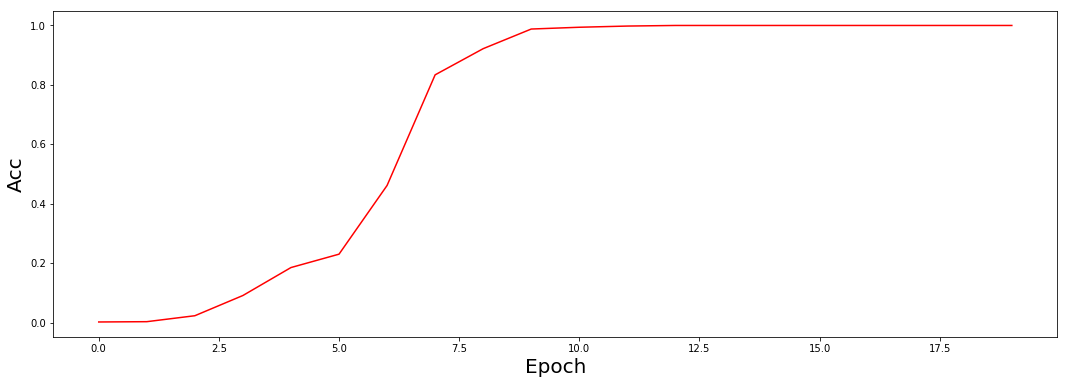

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(list_acc, "-", color="r")
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Acc", fontsize=20)

Text(0,0.5,'Loss')

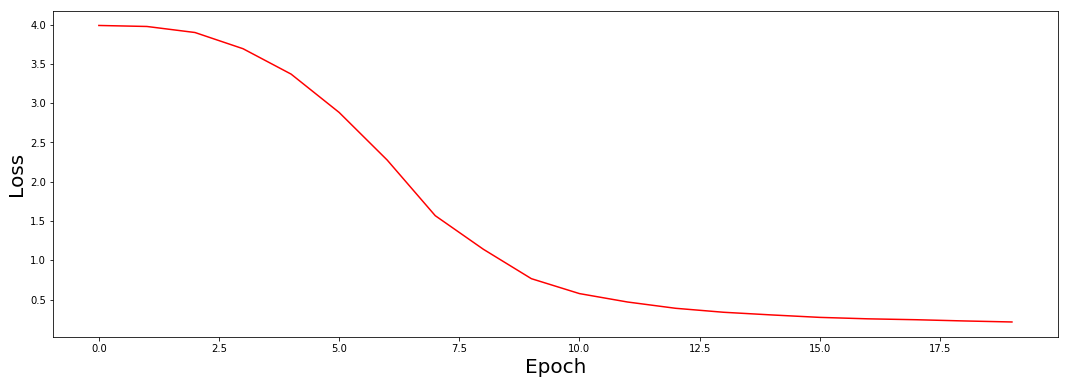

In [9]:
plt.figure(figsize=(18, 6))
plt.plot(list_loss, "-", color="r")
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Loss", fontsize=20)